## <center> Exploratory Data Analysis on Google Play Store Data </center>
### <center> Krutika Ambavane </center>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import plotly.plotly as py
from plotly.graph_objs import *
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly

Populating the interactive namespace from numpy and matplotlib


In [5]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [209]:
ps = pd.read_csv("googleplaystore.csv", encoding = 'latin-1')

In [210]:
ps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [211]:
print(ps.shape)

(10841, 13)


In [212]:
ps.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [213]:
ps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [214]:
ps.Rating.max()
ps.Rating.min()

19.0

1.0

In [215]:
ps[ps.Rating == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Handling null values by dropping them for simplicity

In [216]:
ps.dropna(inplace = True)

In [217]:
print(ps.shape)

(9360, 13)


In [218]:
ps[ps.Rating == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Classifying Type as 0 for Free and 1 as Paid i.e. converting it to binary

In [219]:
ps.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [220]:
def type_classify(types):
    if types == 'Free':
        return 0
    else:
        return 1
    

In [221]:
ps['Type'] = ps.Type.map(type_classify)

In [222]:
ps.Type.unique()

array([0, 1])

In [223]:
ps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### Handling the categorical columns

#### Cleaning the price column and converting it to float

In [224]:
ps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [225]:
def price_cleaning(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

In [226]:
ps['Price']=ps.Price.map(price_cleaning)

In [227]:
ps.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

#### Converting Content Rating categorical column to integer

In [228]:
ps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [229]:
def content_cleaning(content):
    if content == 'Everyone':
        return 0
    elif content == 'Teen':
        return 1
    elif content == 'Everyone 10+':
        return 2
    elif content == 'Mature 17+':
        return 3
    elif content == 'Adults only 18+':
        return 4
    elif content == 'Unrated':
        return 5

In [230]:
ps['ContentRating'] = ps['Content Rating'].map(content_cleaning)

#### Converting Genres categorical column to integer

In [231]:
Genres = ps.Genres.unique()
GenresCleaning = {}
for i in range(len(Genres)):
    GenresCleaning[Genres[i]] = i
ps['Genre'] = ps['Genres'].map(GenresCleaning).astype(int)

In [232]:
ps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ContentRating,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0


#### Cleaning the size column

In [233]:
def size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

In [234]:
ps["Size"] = ps["Size"].map(size)

#### Handling null values in size column

In [235]:
ps['Size'].isnull().any()

True

In [236]:
ps.Size.fillna(method = 'ffill', inplace = True)

In [237]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 15 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null float64
Installs          9360 non-null object
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
ContentRating     9360 non-null int64
Genre             9360 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.1+ MB


#### Converting Reviews column type to int

In [238]:
ps['Reviews'] = ps.Reviews.astype(int)

In [239]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 15 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null object
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
ContentRating     9360 non-null int64
Genre             9360 non-null int64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.1+ MB


In [240]:
ps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#### Converting Category to int

In [294]:
Categories = ps.Category.unique()
CategoryInt = {}
for i in range(len(Categories)):
    CategoryInt[Categories[i]] = i
ps['Categories'] = ps['Category'].map(CategoryInt).astype(int)

In [295]:
ps.Categories.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

### Ratings Distribution

In [325]:
ps.Rating.mean()

4.191837606837612

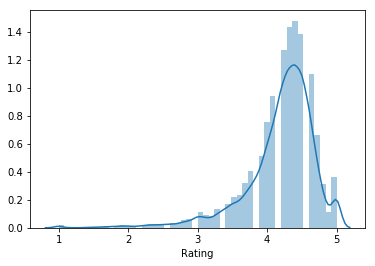

In [318]:
x = ps.Rating
sns.distplot(x)

#### Most apps have ratings between 4 to 5, with avg rating of 4.19. There are few apps with very low ratings between 2 and 1.
#### Lets see which apps are these.

In [326]:
ps[(ps.Rating <=2) & (ps.Rating >= 1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ContentRating,Genre,Categories
518,Just She - Top Lesbian Dating,DATING,1.9,953,1.90e+07,"100,000+",0,0.00,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,3,10,7
554,Just She - Top Lesbian Dating,DATING,1.9,953,1.90e+07,"100,000+",0,0.00,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,3,10,7
625,House party - live chat,DATING,1.0,1,9.20e+06,10+,0,0.00,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up,3,10,7
663,Just She - Top Lesbian Dating,DATING,1.9,954,1.90e+07,"100,000+",0,0.00,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,3,10,7
4006,C by GE,LIFESTYLE,1.7,686,6.60e+06,"10,000+",0,0.00,Everyone,Lifestyle,"July 11, 2018",4.1.07,4.3 and up,0,28,16
4010,Bridge-C - Get More Storage,TOOLS,2.0,24,3.50e+07,"1,000+",0,0.00,Everyone,Tools,"December 29, 2017",1.7,6.0 and up,0,90,25
4127,Speech Therapy: F,FAMILY,1.0,1,1.60e+07,10+,1,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,0,12,18
4161,G-Playlists,TOOLS,1.8,53,3.40e+06,"1,000+",1,1.49,Everyone,Tools,"May 19, 2018",1.91,4.0.3 and up,0,90,25
4522,Q-Tech Companion App,FOOD_AND_DRINK,1.8,17,3.10e+06,"10,000+",0,0.00,Everyone,Food & Drink,"March 8, 2017",1.6.3,4.4 and up,0,24,12
4726,W Box VMS,VIDEO_PLAYERS,1.9,105,9.10e+06,"10,000+",0,0.00,Everyone,Video Players & Editors,"January 9, 2017",4.0.4,2.3.3 and up,0,99,30


In [327]:
len(ps[(ps.Rating <=2) & (ps.Rating >= 1)])

68

In [328]:
low_rating = ps[(ps.Rating <=2) & (ps.Rating >= 1)]

In [335]:
low_rating[low_rating.Rating == 1.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ContentRating,Genre,Categories
625,House party - live chat,DATING,1.0,1,9.20e+06,10+,0,0.00,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up,3,10,7
4127,Speech Therapy: F,FAMILY,1.0,1,1.60e+07,10+,1,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,0,12,18
5151,Clarksburg AH,MEDICAL,1.0,1,2.80e+07,50+,0,0.00,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up,0,84,19
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.00e+06,50+,1,1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up,0,12,18
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.90e+06,"1,000+",0,0.00,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up,0,33,17
6490,MbH BM,MEDICAL,1.0,1,2.30e+06,100+,0,0.00,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up,0,84,19
7144,CB Mobile Biz,FINANCE,1.0,3,8.40e+06,500+,0,0.00,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up,0,23,11
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.60e+06,100+,0,0.00,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up,0,93,27
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,1.30e+07,100+,0,0.00,Everyone,Communication,"October 6, 2017",1.0,4.1 and up,0,9,6
7806,CR Magazine,BUSINESS,1.0,1,7.80e+06,100+,0,0.00,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up,0,6,4


## Exploring the categories

### Top 5 categories based on no. of apps

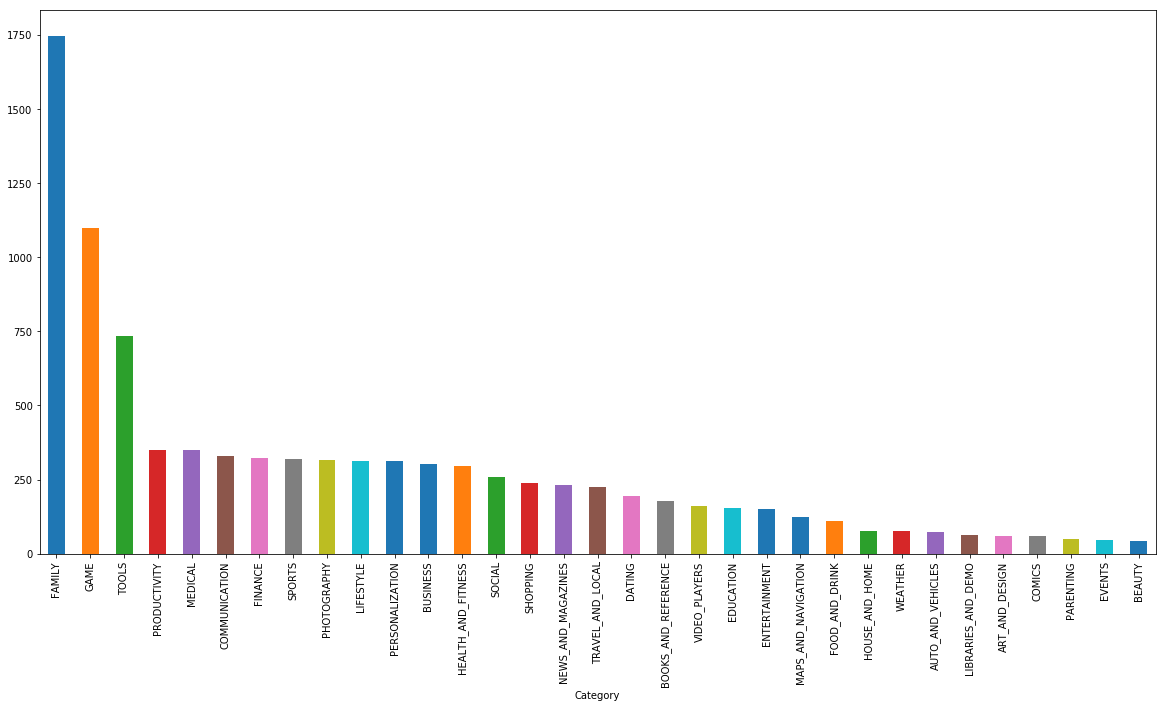

In [296]:
ps.groupby('Category')['App'].count().sort_values(ascending = False).plot(kind='bar',figsize=(20,10))

In [297]:
ps.groupby('Category')['App'].count().sort_values(ascending = False).head(5)

Category
FAMILY          1746
GAME            1097
TOOLS            733
PRODUCTIVITY     351
MEDICAL          350
Name: App, dtype: int64

#### We can see that Family and Game categories have the most number of apps developed

### Top 5 categories based on ratings recieved

#### Let's see which categories have high average ratings and thus are doing good

In [312]:
ps.groupby('Category')['Rating'].mean().sort_values(ascending = False).head(5)

Category
EVENTS                 4.44
EDUCATION              4.39
ART_AND_DESIGN         4.38
BOOKS_AND_REFERENCE    4.35
PERSONALIZATION        4.34
Name: Rating, dtype: float64

#### But in terms of ratings recieved, Events and Education categories are highest

In [298]:
ps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ContentRating,Genre,Categories
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.90e+07,"10,000+",0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.40e+07,"500,000+",0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1,0
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.70e+06,"5,000,000+",0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0,0


### Top 5 Genres based on no. of apps

In [299]:
ps.groupby('Genres')['App'].count().sort_values(ascending = False).head(5).reset_index(name="Count")

,Genres,Count
0,Tools,732
1,Entertainment,533
2,Education,468
3,Action,358
4,Productivity,351


### Top 5 genres based on ratings received

#### Let's see which genres have high average ratings

In [313]:
ps.groupby('Genres')['Rating'].mean().sort_values(ascending = False).head(5)

Genres
Board;Pretend Play            4.8
Comics;Creativity             4.8
Health & Fitness;Education    4.7
Puzzle;Education              4.6
Adventure;Brain Games         4.6
Name: Rating, dtype: float64

### Lets see if the app size affects the app rating

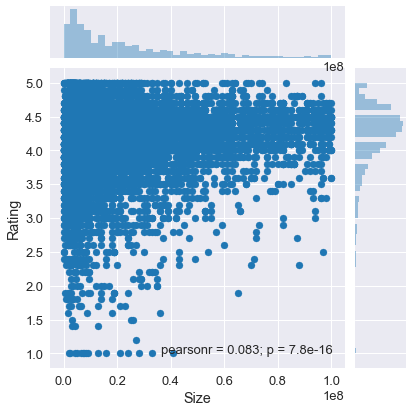

In [322]:
sns.set_style("darkgrid")
ax = sns.jointplot(ps['Size'], ps['Rating'])

#### The apps with size within 15MB to 40MB are most highly rated

In [336]:
ps[(ps.Rating<= 5.0)&(ps.Rating>=4.0)]['Size'].mean()

24272709.2896917